## Kütüphane İmport

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/My Drive/Kaggle"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!cd /content/gdrive/My Drive/Kaggle
!kaggle datasets download -d anthonypino/melbourne-housing-market
!unzip \*.zip

/bin/bash: line 1: cd: too many arguments
melbourne-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  melbourne-housing-market.zip
replace MELBOURNE_HOUSE_PRICES_LESS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: MELBOURNE_HOUSE_PRICES_LESS.csv  
replace Melbourne_housing_FULL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Melbourne_housing_FULL.csv  


## Dataya Genel Bakış

In [3]:
data = pd.read_csv("Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataa = data.copy()

In [5]:
dataa.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
dataa.size

731997

In [7]:
dataa.ndim

2

In [8]:
dataa.shape

(34857, 21)

In [9]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Sütünların ortalama, medyan, standart sapma gibi istatistiksel bilgilere bir göz atabiliriz.

In [10]:
dataa.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


##EDA

Datamızdaki missing değerleri içeren sütünları: tespit ediyoruz.

In [11]:
dataa.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Bir tane birebir aynı satır tespit edildi.

In [12]:
dataa.duplicated().sum()
dataa.loc[dataa.duplicated(keep = False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [13]:
dataa.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

Price sütunundaki boş değer sütunun ortalaması ile dolduruldu.

In [14]:
mean_price = dataa.describe().Price["mean"].round()
dataa.loc[dataa.Price.isnull(), "Price"] = mean_price  # alternatif mean bulma ????
dataa.Price.isnull().sum()

0

Bir evin yapım yılı 2023'ten büyük olamaz ama bir tane 2106 yılı üretim gözüken bir satır, bunu kaldırıyoruz.

In [15]:
dataa.YearBuilt.describe()

count    15551.000000
mean      1965.289885
std         37.328178
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       2000.000000
max       2106.000000
Name: YearBuilt, dtype: float64

In [16]:
dataa[dataa["YearBuilt"]>2023]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,1050173.0,SP,Ray,7/11/2016,11.8,3105.0,...,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


In [17]:
dataa.drop(labels = [2453], axis = 0, inplace = True)

Kategorik sütunlardaki boş değerleri sütünun mod değeri ile doldurduk.

In [18]:
catagorical_columns = dataa.select_dtypes(include=["object"])
for column in catagorical_columns.columns:
  dataa[column] = dataa[column].fillna(dataa[column].mode().iloc[0])

Numeric değerlerde describe metodu ile sütünları gözlemyip, boş değerleri teker teker doldurdum.

In [19]:
dataa.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude         7976
Longtitude        7976
Regionname           0
Propertycount        3
dtype: int64

In [20]:
dataa["Bedroom2"].describe()

count    26639.000000
mean         3.084613
std          0.980692
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: Bedroom2, dtype: float64

In [21]:
dataa["Bedroom2"] = dataa["Bedroom2"].fillna(3.0)

In [22]:
dataa.Bathroom.describe() #fill 2

count    26630.000000
mean         1.624784
std          0.724222
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

In [23]:
dataa["Bathroom"] = dataa["Bathroom"].fillna(2.0)

In [24]:
dataa.Car.describe() # fill 2

count    26128.000000
mean         1.728835
std          1.010789
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

In [25]:
dataa["Car"] = dataa["Car"].fillna(2.0)

In [26]:
dataa.Landsize.describe() # fill 525

count     23046.000000
mean        593.593118
std        3398.915572
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

In [27]:
dataa["Landsize"] = dataa["Landsize"].fillna(525.0)

In [28]:
dataa.BuildingArea.describe() #fill 145

count    13741.000000
mean       160.249505
std        401.280848
min          0.000000
25%        102.000000
50%        136.000000
75%        188.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [29]:
dataa["BuildingArea"] = dataa["BuildingArea"].fillna(145.0)

In [30]:
dataa.YearBuilt.describe() # fill 1970

count    15550.000000
mean      1965.280836
std         37.312318
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       2000.000000
max       2019.000000
Name: YearBuilt, dtype: float64

In [31]:
dataa["YearBuilt"] = dataa["YearBuilt"].fillna(1970.0)

In [32]:
dataa.Lattitude.describe() #fill -37.8

count    26880.000000
mean       -37.810636
std          0.090280
min        -38.190430
25%        -37.862950
50%        -37.807600
75%        -37.754092
max        -37.390200
Name: Lattitude, dtype: float64

In [33]:
dataa["Lattitude"] = dataa["Lattitude"].fillna(-37.8)

In [34]:
dataa.Longtitude.describe() # fill 145.0

count    26880.000000
mean       145.001848
std          0.120170
min        144.423790
25%        144.933500
50%        145.007800
75%        145.071900
max        145.526350
Name: Longtitude, dtype: float64

In [35]:
dataa["Longtitude"] = dataa["Longtitude"].fillna(145.0)

In [36]:
dataa.Propertycount.describe()

count    34853.000000
mean      7572.977046
std       4428.122847
min         83.000000
25%       4385.000000
50%       6763.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64

Toplam 3 satır boş değeri olan sütünların satırları datasetten çıkarıldı.

In [37]:
dataa.dropna(subset=["Propertycount","Distance","Postcode"],inplace = True)

Null değerleri kontrol edelim.Doldurmadığımız kısım kalmış mı?

In [38]:
dataa.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Z-score metodu ile Landsize ve BuildingArea sütunlarının Outlier değerleri düzeltilmeye çalışıldı.

<Axes: >

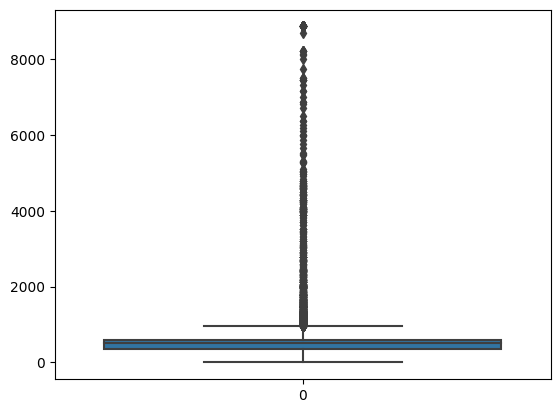

In [39]:
upper_limit = dataa["Landsize"].mean() +  3*dataa["Landsize"].std()
lower_limit = dataa["Landsize"].mean() -  3*dataa["Landsize"].std()
dataa.loc[dataa["Landsize"]>upper_limit, "Landsize"] = upper_limit
dataa.loc[dataa["Landsize"]<lower_limit, "Landsize"] = lower_limit
sns.boxplot(dataa["Landsize"])

<Axes: >

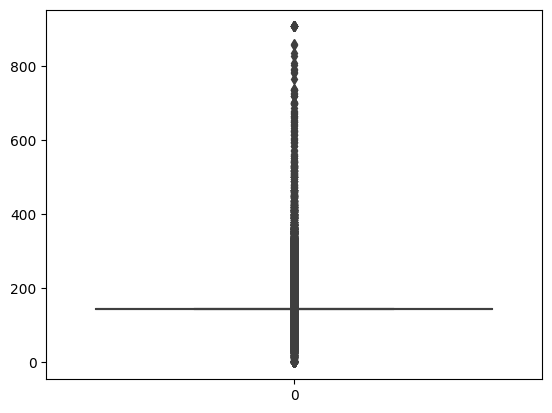

In [40]:
upper_limit = dataa["BuildingArea"].mean() +  3*dataa["BuildingArea"].std()
lower_limit = dataa["BuildingArea"].mean() -  3*dataa["BuildingArea"].std()
dataa.loc[dataa["BuildingArea"]>upper_limit, "BuildingArea"] = upper_limit
dataa.loc[dataa["BuildingArea"]<lower_limit, "BuildingArea"] = lower_limit
sns.boxplot(dataa["BuildingArea"])

##Data Görselleştirme

Histogram

<Axes: xlabel='Price', ylabel='Count'>

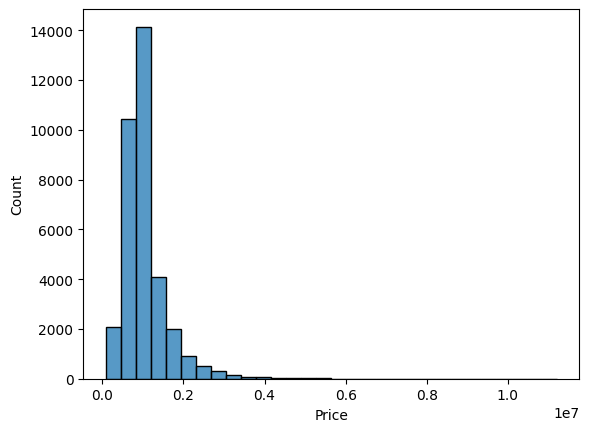

In [41]:
sns.histplot(data = dataa, x = "Price",bins = 30, kde =False)

<Axes: xlabel='Price', ylabel='Count'>

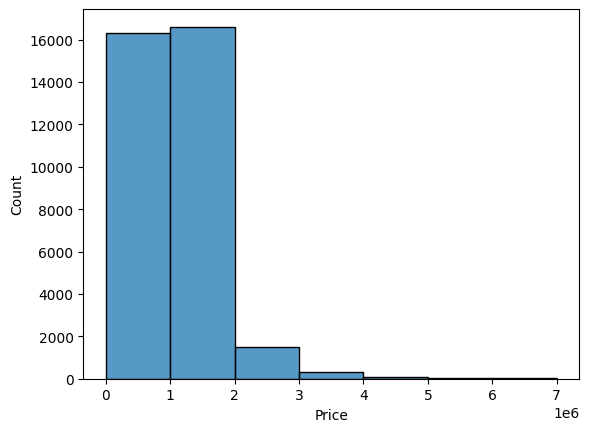

In [42]:
sns.histplot(data = dataa, x = "Price",bins = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000], kde =False)

Pair Plot

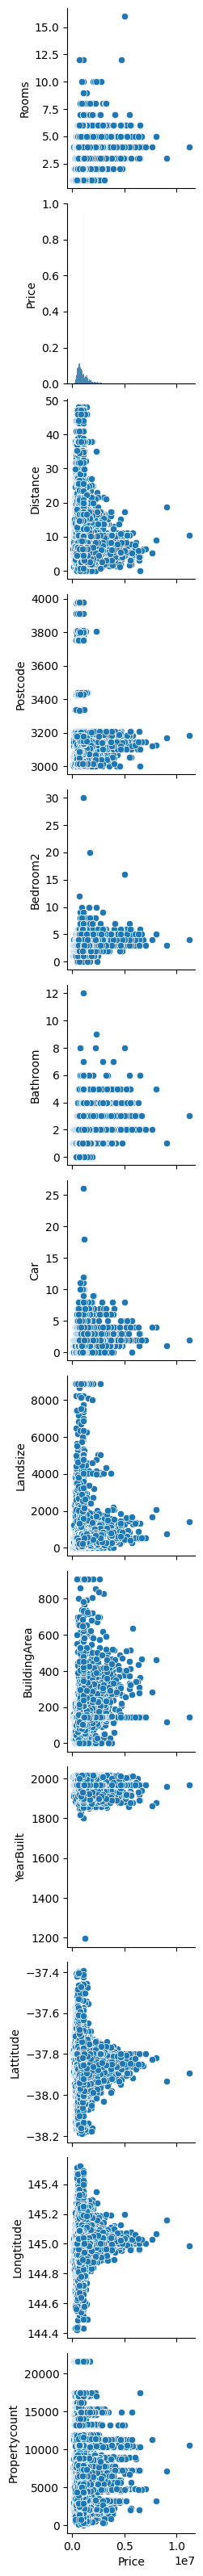

In [43]:
numerical_columns = dataa.select_dtypes(include=["float64", "int64"])
sns.pairplot(numerical_columns, x_vars=["Price"], y_vars = list(numerical_columns.columns))  # hue parametresi kullanarak dağılımın katagorik olarak renklendirilir
                                                                                             # kind = kde or reg ile grafik tipi değiştirilebilir

Heat Map

<ipython-input-44-f3c896091134>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataa.corr()


<Axes: >

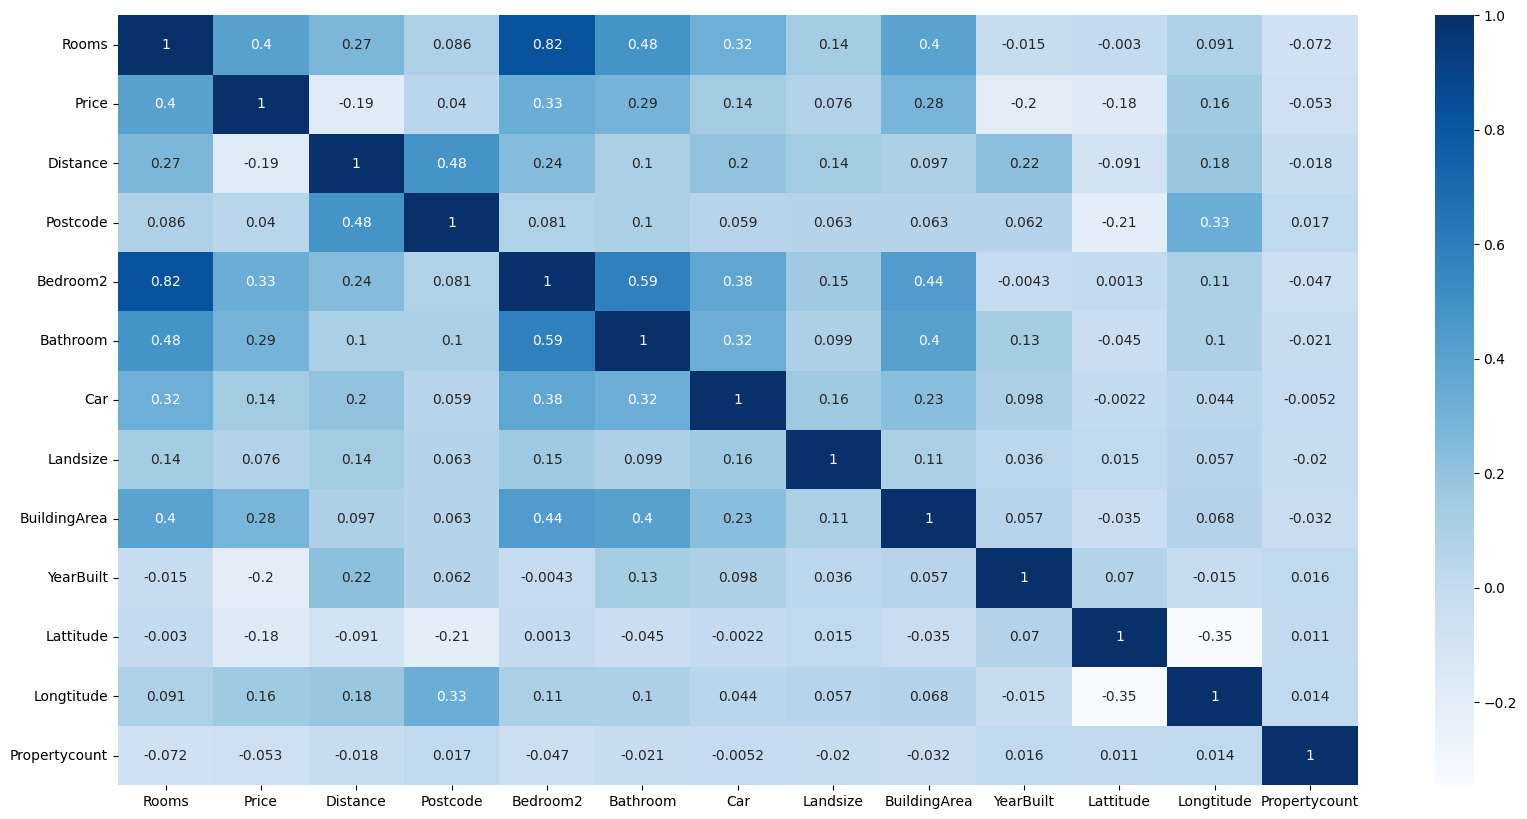

In [44]:
corr = dataa.corr()
fig = plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot = True)

One Hot Encoding

In [45]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns = categorical_col, drop_first = drop_first)
  return dataframe
cat_col = [column for column in catagorical_columns if 12 >= dataa[column].nunique() > 2]
dataa = one_hot_encoder(dataa, cat_col, drop_first=True)

Label Encoding

In [46]:
cat_col_12 = ["Suburb", "Address", "SellerG", "Date", "CouncilArea"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataa[cat_col_12] = le.fit_transform(dataa[cat_col_12].columns)

Standard Scaler ile datamızdaki numeric değerler scale edildi.Bu sayede data özellikleri arasında doğru ilişkiler kurulabilecek.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataa[numerical_columns.columns] = scaler.fit_transform(dataa[numerical_columns.columns])

##Model Selection

In [48]:
y = dataa["Price"]
X = dataa.drop("Price", axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_validate

In [50]:
models = {
'Lasso': {
'model': Lasso(alpha=1.0)
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet(alpha=1.0, l1_ratio = 0.5)
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor(11)
},
'RandomForestRegressor': {
'model': RandomForestRegressor(n_estimators = 250, random_state = 42)
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor(max_depth = 2 , n_estimators=2, random_state = 2, learning_rate=1.0 )
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}


In [51]:
for name, model_dict in models.items():
  cv_results = cross_validate(model_dict["model"], X_train, y_train, cv=10, scoring=["neg_mean_squared_error","neg_root_mean_squared_error","neg_mean_absolute_error","r2"],error_score='raise')
  print(f'########## {name} ##########')
  print(f'MSE: {round(cv_results["test_neg_mean_squared_error"].mean(), 4)}')
  print(f'RSE: {round(cv_results["test_neg_root_mean_squared_error"].mean(), 4)}')
  print(f'MAE: {round(cv_results["test_neg_mean_absolute_error"].mean(), 4)}')
  print(f'R2: {round(cv_results["test_r2"].mean(), 4)}')

########## Lasso ##########
MSE: -0.9954
RSE: -0.997
MAE: -0.6267
R2: -0.0005
########## LinearRegression ##########
MSE: -0.561
RSE: -0.7483
MAE: -0.4918
R2: 0.4362
########## Ridge ##########
MSE: -0.5609
RSE: -0.7483
MAE: -0.4918
R2: 0.4362
########## ElasticNet ##########
MSE: -0.9954
RSE: -0.997
MAE: -0.6267
R2: -0.0005
########## KNeighborsRegressor ##########
MSE: -0.509
RSE: -0.7127
MAE: -0.4427
R2: 0.4884
########## RandomForestRegressor ##########
MSE: -0.4521
RSE: -0.6712
MAE: -0.3965
R2: 0.546
########## GradientBoostingRegressor ##########
MSE: -0.652
RSE: -0.8069
MAE: -0.534
R2: 0.3443
########## AdaBoostRegressor ##########
MSE: -0.6703
RSE: -0.8178
MAE: -0.5765
R2: 0.3258
